# Seismic spectrogram analysis

The code provides a set of Python functions for importing, visualizing, and analyzing seismic data. The functions allow the user to import a seismic volume from a SEGY file, calculate correlations between neighboring traces, obtain the average trace, and perform spectrogram analysis on a seismic trace. The code is open source and can be modified to fit specific needs.

The code can be broken down into 5 main blocks, each of which is defined by a specific function.

* **Importing the SEGY file:** `import_segy_volume`<br>
Imports a SEGY volume from a specified file into Python's environment.<br>


* **Plotting correlation maps:** `correlation_heatmap`<br>
Plots a correlation map using a heatmap.<br>


* **Calculating the average trace from the seismic volume:** `average_trace`<br>
Calculates the average trace from neighboring traces around a central trace.<br>


* **Plotting seismic traces:** `trace_plot`<br>
Plots two seismic traces, allowing the user to compare any arbitrary traces.<br>


* **Performing spectrogram analysis:** `spectrogram_analysis`<br>
Performs spectrogram analysis of a given trace signal.<br>


### MODULE IMPORT

In [1]:
import utils as ut

### UTILITY CLASSES

### IMPORT SEGY DATA

The `import_segy_volume` function imports a SEGY volume from a specified file. The function takes two arguments: the file path to the SEGY file and a boolean value that specifies whether to enable strict mode for SEGY file reading.

The function first imports the SEGY file using the `segyio.open` function. This function returns a `segyio.SegyFile` object, which contains the seismic volume data and metadata. The function then extracts the seismic volume data from the `segyio.SegyFile` object and stores it in a NumPy array (Output #1). The function also extracts the metadata from the `segyio.SegyFile` object and stores it in a dictionary (Output #2).

Finally, the function prints the inline and crossline indices of the seismic volume. The function then returns the NumPy array containing the seismic volume data, the dictionary containing the metadata, and the sample rate.

To navigate this object, you can use the `help(segyio.SegyFile)` function.

In [2]:
#%% IMPORT SIGNAL DATA
segy_file_path = "... seismic.sgy" #Path to the seismic SEG-Y  file.
vol, metadata, sample_rate = ut.import_segy_volume(file_path=segy_file_path)


SEGY file imported
IL: 800-1200
XL: 1400-1800


In [3]:
dt=0.002 #Sample rate in seconds.

### DEFINE WELL TRACE & NEIGHBORING TRACES

The trace to be analyzed is specified by its inline and crossline numbers, denoted as well_ilxl = ( #il, #xl). If the signal analysis is being carried out in the context of a well tie process, this values of inline and crossline have to correspond to the location of the well.

In [4]:
well_ilxl = (1000,1650)   #Number of inline and crossline.

In [5]:
main_trace = ut.Trace(ilxl=(1000, 1650), seismic_volume_data=vol, seismic_volume_meta=metadata)
type(main_trace)

utils.custom_functions.Trace

### TRACE CORRELATION ANALYSIS

#### Main trace

The `neighboring_traces_correlation` function calculates the correlation coefficients between a central trace and its neighboring traces. The function takes three arguments:

* The `central_trace` object, which is a seismic trace object that represents the central trace.
* The `seismic_volume_data` array, which is a 3D array that represents the seismic volume data.
* The `seismic_volume_meta` object, which is a metadata object that contains information about the seismic volume data.

The function first unpacks the inline/crossline values of the central trace. Then, it generates inline and crossline arrays for the neighboring traces. The function then calculates the correlation coefficient between the central trace and each of the neighboring traces. The correlation coefficients are stored in a 2D array. Finally, the function plots a heatmap of the correlation coefficients.

The `neighboring_traces_correlation` function can be used to visualize the spatial correlation between seismic traces. This information can be used to identify areas of the seismic volume that are likely to be coherent.


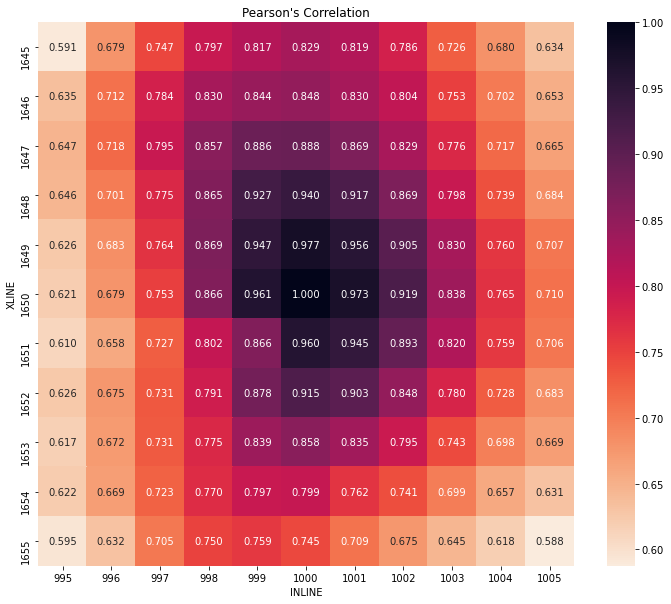

In [6]:
IL, XL, CORR = ut.neighboring_traces_correlation(central_trace=main_trace, 
                                              seismic_volume_data=vol, 
                                              seismic_volume_meta=metadata, 
                                              neighbors=5)

#### Average trace

The `average_trace` function calculates the average trace from neighboring traces around a central trace. The function takes four arguments:

* The `central_trace` object, which is a seismic trace object that represents the central trace.
* The `seismic_volume_data` array, which is a 3D array that represents the seismic volume data.
* The `seismic_volume_meta` object, which is a metadata object that contains information about the seismic volume data.
* The `neighbors` integer, which specifies the number of neighboring traces to consider.

The function first unpacks the inline/crossline values of the central trace. Then, it generates inline and crossline arrays for the neighboring traces. The function then creates an empty array to store the neighboring traces.

The function then loops over the neighboring traces and creates a `Trace` object for each trace. The `Trace` object is used to extract the data for the trace from the `seismic_volume_data` array. The data for the trace is then stored in the empty array.

Finally, the function calculates the average trace by taking the mean of the data in the empty array. The function then prints the number of traces that were averaged.

The `average_trace` function can be used to calculate the average trace from a seismic volume. This information can be used to identify the average seismic response of the area around the central trace.


In [7]:
avg_trace = ut.average_trace(central_trace=main_trace, 
                              seismic_volume_data=vol, 
                              seismic_volume_meta=metadata, 
                              neighbors=1)

- 9 traces averaged.


The `trace_plot` function can be used to visualize two seismic traces. This information can be used to compare the two traces and to identify features of the seismic data. For this, the function takes four arguments:

* The `trace1` array, which is the first trace to plot.
* The `trace2` array, which is the second trace to plot.
* The `label1` string, which is the label for the first trace.
* The `label2` string, which is the label for the second trace.
* The `dt` float, which is the sampling interval.

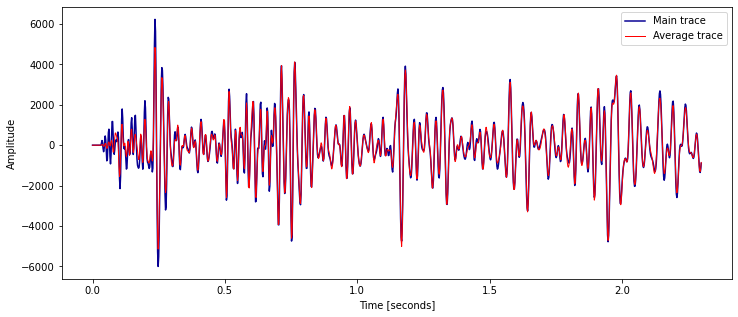

In [8]:
ut.trace_plot(trace1=main_trace.data, trace2=avg_trace, label1="Main trace", label2="Average trace", dt=0.002)

### SPECTROGRAM CALCULATION

The `spectrogram_analysis` function performs spectrogram analysis of a given trace signal. The function takes four arguments:

* The `trace` array, which is the 1D array representing the input trace signal.
* The `dt` float, which is the time interval between samples in seconds.
* The `wl` int, which is the window length for the spectrogram analysis.
* The `ws` int, which is the window step size for the spectrogram analysis.

The function first calculates the amplitude spectrogram and the phase of the original signal. Then, the function plots the time series, the amplitude spectrogram, and the phase variation. Finally, the function saves the plot as an image file.

The `spectrogram_analysis` function can be used to visualize the frequency and phase content of a seismic trace. This information can be used to identify features of the seismic data, such as the dominant frequencies and the phase relationships between different frequencies.


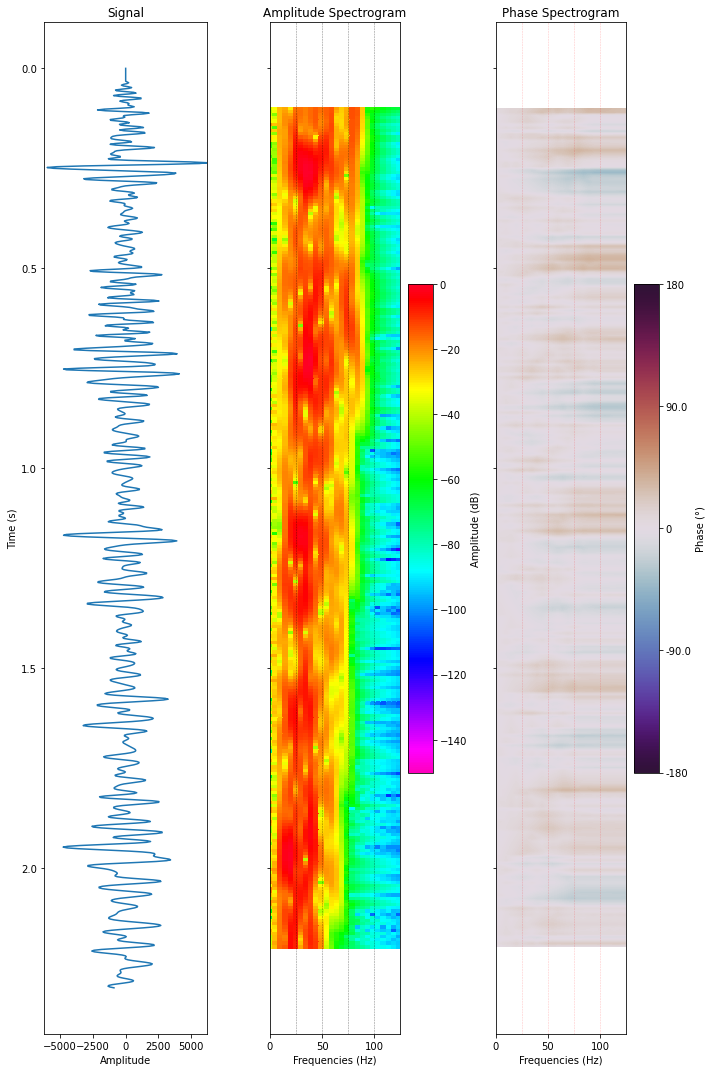

In [9]:
ut.spectrogram_analysis(trace=main_trace.data, dt=0.002, wl=101, ws=4)